In [1]:
from pathlib import Path
import sys
project_root = next((parent for parent in [Path.cwd()] + list(Path.cwd().parents) if (parent / "pyproject.toml").exists()), Path.cwd())
sys.path.append(str(project_root))

In [2]:
output_path = project_root / "arc2_partial_20.parquet"

In [3]:
from llm_python.datasets.superking import load_superking

superking_df = load_superking()

Bucket: gs://trelis-arc/datasets/superking/
Found 54 parquet files in datasets/superking/
Loading superking dataset...


In [ ]:
# Keep only refined examples.
from llm_python.datasets.query import filter_soar_df


df = superking_df.copy()
df = filter_soar_df(
    df,
    exclude_subset="arc-prize-2025/evaluation",
    any_train_correct=True,
    exclude_transductive=True
)


In [5]:
import numpy as np

from llm_python.datasets.query import sample_by_task

df["correct_train_input_count"] = df["correct_train_input"].apply(lambda x: np.sum(x))
df["correct_test_input_count"] = df["correct_test_input"].apply(lambda x: np.sum(x))
df["code_length"] = df["code"].str.len()

df = sample_by_task(
    df,
    sort_keys=["correct_test_input_count", "correct_train_input_count", "code_length"],
    sort_ascending=[False, False, True],
    task_limit=20,
)

In [6]:
from llm_python.datasets.io import write_soar_parquet
from llm_python.datasets.schema import PARQUET_SCHEMA

print(f"Saving final dataset to: {output_path}")
write_soar_parquet(df, output_path, schema=PARQUET_SCHEMA)
print("Done.")

Saving final dataset to: /home/lewis/code/trelis-arc/arc2_partial_20.parquet
Done.


DATASET STATISTICS ANALYSIS: arc2_partial_20
1. Computing basic statistics...
📊 Basic Statistics:
   • Unique tasks: 694
   • Total programs: 10,363
   • Fully correct programs: 10,363 (100.0%)
   • Partially correct programs: 0 (0.0%)
   • Completely incorrect programs: 0 (0.0%)
   • Average correctness rate: 1.000

2. Computing per-task distributions...
📈 Per-task Statistics:
   • Average programs per task: 14.9
   • Median programs per task: 20.0
   • Min programs per task: 1
   • Max programs per task: 20
   • Tasks with 20 programs (max): 417
   • Tasks with fully correct programs: 694
   • Tasks with no correct programs: 0

3. Computing quantile distribution of programs per task...
📊 Programs per Task - Quantile Distribution:
   • 0th percentile (min): 1.0
   • 25th percentile: 8.0
   • 50th percentile (median): 20.0
   • 75th percentile: 20.0
   • 90th percentile: 20.0
   • 95th percentile: 20.0
   • 99th percentile: 20.0
   • 100th percentile (max): 20.0

4. Creating visualizat

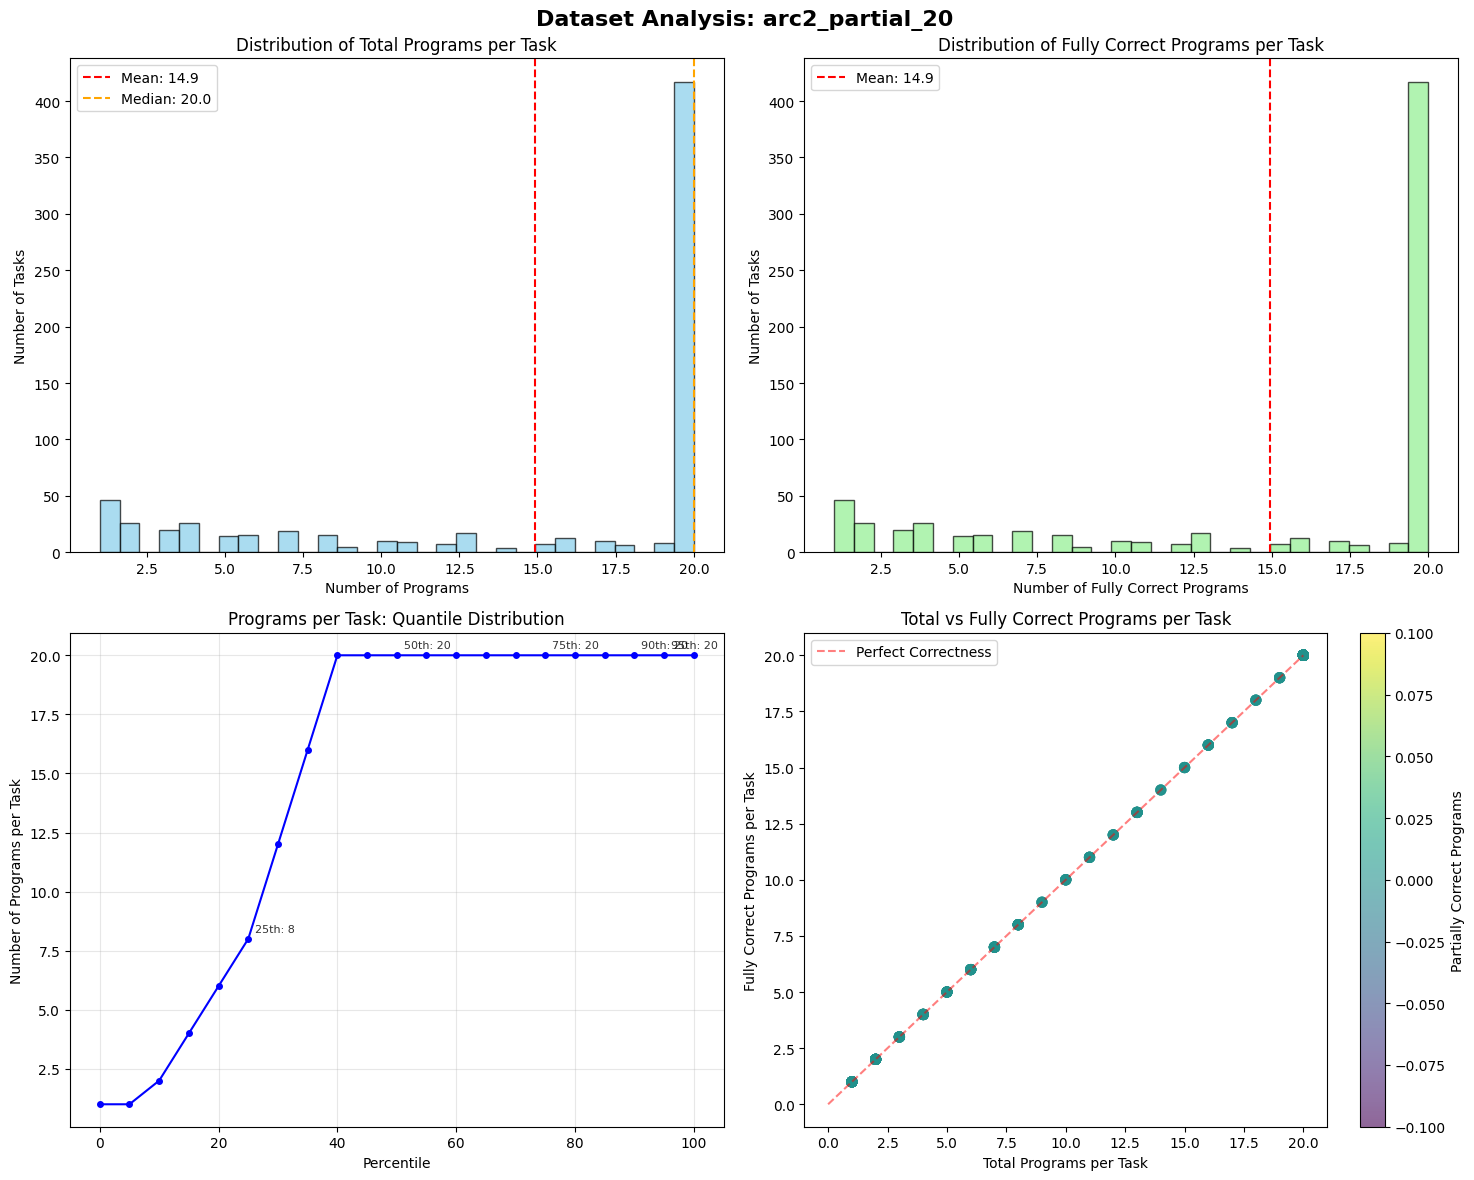


✓ Analysis complete! Generated visualizations showing:
   • Program distribution patterns across tasks
   • Quantile distribution of programs per task
   • Relationship between total and correct programs per task


In [7]:
from llm_python.datasets.statistics import analyze_dataset_statistics

analyze_dataset_statistics(df, output_path.parts[-1].replace(".parquet", ""))